Parkinson dataset from Kaggle : https://kaggle.com/datasets/debasisdotcom/parkinson-disease-detection/data

#### Attribute Information:
Matrix column entries (attributes):
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# Import all the tools we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay

C:\Users\USER\Miniconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\USER\AppData\Local\Temp\ipykernel_27332\4143060946.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load Data

In [2]:
df = pd.read_csv("Parkinsson disease.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5,phon_R01_S01_6,phon_R01_S02_1,phon_R01_S02_2,phon_R01_S02_3,phon_R01_S02_4,...,phon_R01_S49_3,phon_R01_S49_4,phon_R01_S49_5,phon_R01_S49_6,phon_R01_S50_1,phon_R01_S50_2,phon_R01_S50_3,phon_R01_S50_4,phon_R01_S50_5,phon_R01_S50_6
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014,120.552,120.267,107.332,95.73,95.056,...,116.286,116.556,116.342,114.563,201.774,174.188,209.516,174.688,198.764,214.289
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781,131.162,137.244,113.84,132.068,120.103,...,177.291,592.03,581.289,119.167,262.707,230.978,253.017,240.005,396.961,260.277
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655,113.787,114.82,104.315,91.754,91.226,...,96.983,86.228,94.246,86.647,78.228,94.261,89.488,74.287,74.904,77.973
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284,0.00968,0.00333,0.0029,0.00551,0.00532,...,0.00314,0.00496,0.00267,0.00327,0.00694,0.00459,0.00564,0.0136,0.0074,0.00567
MDVP:Jitter(Abs),0.00007,0.00008,0.00009,0.00009,0.00011,0.00008,0.00003,0.00003,0.00006,0.00006,...,0.00003,0.00004,0.00002,0.00003,0.00003,0.00003,0.00003,0.00008,0.00004,0.00003
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655,0.00463,0.00155,0.00144,0.00293,0.00268,...,0.00134,0.00254,0.00115,0.00146,0.00412,0.00263,0.00331,0.00624,0.0037,0.00295
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908,0.0075,0.00202,0.00182,0.00332,0.00332,...,0.00192,0.00263,0.00148,0.00184,0.00396,0.00259,0.00292,0.00564,0.0039,0.00317
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966,0.01388,0.00466,0.00431,0.0088,0.00803,...,0.00403,0.00762,0.00345,0.00439,0.01235,0.0079,0.00994,0.01873,0.01109,0.00885
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425,0.04701,0.01608,0.01567,0.02093,0.02838,...,0.01564,0.0166,0.013,0.01185,0.02574,0.04087,0.02751,0.02308,0.02296,0.01884


In [4]:
df.shape

(195, 24)

In [5]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
df["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status'>

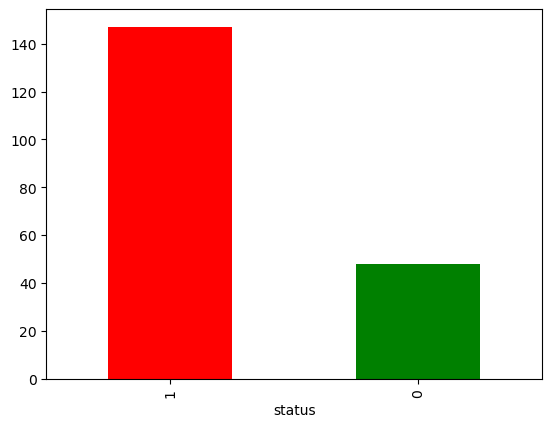

In [7]:
df["status"].value_counts().plot(kind="bar", color=["red", "green"])

In [8]:
import math
math.floor(df["status"].value_counts()[1] / df["status"].value_counts()[0]) 

3

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
# Are there any missing values
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5,phon_R01_S01_6,phon_R01_S02_1,phon_R01_S02_2,phon_R01_S02_3,phon_R01_S02_4,...,phon_R01_S49_3,phon_R01_S49_4,phon_R01_S49_5,phon_R01_S49_6,phon_R01_S50_1,phon_R01_S50_2,phon_R01_S50_3,phon_R01_S50_4,phon_R01_S50_5,phon_R01_S50_6
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014,120.552,120.267,107.332,95.73,95.056,...,116.286,116.556,116.342,114.563,201.774,174.188,209.516,174.688,198.764,214.289
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781,131.162,137.244,113.84,132.068,120.103,...,177.291,592.03,581.289,119.167,262.707,230.978,253.017,240.005,396.961,260.277
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655,113.787,114.82,104.315,91.754,91.226,...,96.983,86.228,94.246,86.647,78.228,94.261,89.488,74.287,74.904,77.973
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284,0.00968,0.00333,0.0029,0.00551,0.00532,...,0.00314,0.00496,0.00267,0.00327,0.00694,0.00459,0.00564,0.0136,0.0074,0.00567
MDVP:Jitter(Abs),0.00007,0.00008,0.00009,0.00009,0.00011,0.00008,0.00003,0.00003,0.00006,0.00006,...,0.00003,0.00004,0.00002,0.00003,0.00003,0.00003,0.00003,0.00008,0.00004,0.00003
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655,0.00463,0.00155,0.00144,0.00293,0.00268,...,0.00134,0.00254,0.00115,0.00146,0.00412,0.00263,0.00331,0.00624,0.0037,0.00295
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908,0.0075,0.00202,0.00182,0.00332,0.00332,...,0.00192,0.00263,0.00148,0.00184,0.00396,0.00259,0.00292,0.00564,0.0039,0.00317
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966,0.01388,0.00466,0.00431,0.0088,0.00803,...,0.00403,0.00762,0.00345,0.00439,0.01235,0.0079,0.00994,0.01873,0.01109,0.00885
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425,0.04701,0.01608,0.01567,0.02093,0.02838,...,0.01564,0.0166,0.013,0.01185,0.02574,0.04087,0.02751,0.02308,0.02296,0.01884


<!-- ### Comparing status to MDVP:Fhi(Hz) - Maximum vocal fundamental frequency -->y

In [13]:
# pd.crosstab(df["status"], df["MDVP:Fhi(Hz)"]) 	

In [14]:
# # Create a plot of crosstab
# pd.crosstab(df["status"], df["MDVP:Fhi(Hz)"]).plot(kind="bar",
#                                    figsize=(8, 5),
#                                    color=["salmon", "lightblue"])
# plt.title("Parkinson Disease Frequency for Maximum vocal fundamental frequency ")
# plt.xlabel("0 = health, 1 = Parkinson")
# plt.ylabel("Maximum vocal fundamental frequency")
# # plt.legend(["female", "male"])
# plt.xticks(rotation=0);

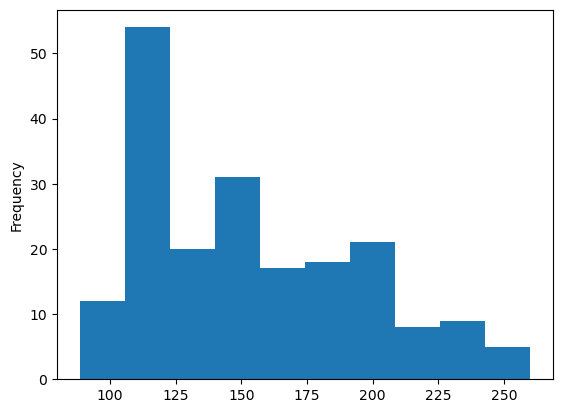

In [15]:
df["MDVP:Fo(Hz)"].plot.hist();

In [16]:
pd.api.types.is_string_dtype(df["name"])

True

In [17]:
# Find the columns which contains strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

name


In [18]:
# This will turn all of the string value into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              195 non-null    category
 1   MDVP:Fo(Hz)       195 non-null    float64 
 2   MDVP:Fhi(Hz)      195 non-null    float64 
 3   MDVP:Flo(Hz)      195 non-null    float64 
 4   MDVP:Jitter(%)    195 non-null    float64 
 5   MDVP:Jitter(Abs)  195 non-null    float64 
 6   MDVP:RAP          195 non-null    float64 
 7   MDVP:PPQ          195 non-null    float64 
 8   Jitter:DDP        195 non-null    float64 
 9   MDVP:Shimmer      195 non-null    float64 
 10  MDVP:Shimmer(dB)  195 non-null    float64 
 11  Shimmer:APQ3      195 non-null    float64 
 12  Shimmer:APQ5      195 non-null    float64 
 13  MDVP:APQ          195 non-null    float64 
 14  Shimmer:DDA       195 non-null    float64 
 15  NHR               195 non-null    float64 
 16  HNR               195 non-

In [20]:
df.name

0      phon_R01_S01_1
1      phon_R01_S01_2
2      phon_R01_S01_3
3      phon_R01_S01_4
4      phon_R01_S01_5
            ...      
190    phon_R01_S50_2
191    phon_R01_S50_3
192    phon_R01_S50_4
193    phon_R01_S50_5
194    phon_R01_S50_6
Name: name, Length: 195, dtype: category
Categories (195, object): ['phon_R01_S01_1' < 'phon_R01_S01_2' < 'phon_R01_S01_3' < 'phon_R01_S01_4' ... 'phon_R01_S50_3' < 'phon_R01_S50_4' < 'phon_R01_S50_5' < 'phon_R01_S50_6']

In [21]:
# This will turn the categorical types into numbers

In [22]:
df.name.cat.categories

Index(['phon_R01_S01_1', 'phon_R01_S01_2', 'phon_R01_S01_3', 'phon_R01_S01_4',
       'phon_R01_S01_5', 'phon_R01_S01_6', 'phon_R01_S02_1', 'phon_R01_S02_2',
       'phon_R01_S02_3', 'phon_R01_S02_4',
       ...
       'phon_R01_S49_3', 'phon_R01_S49_4', 'phon_R01_S49_5', 'phon_R01_S49_6',
       'phon_R01_S50_1', 'phon_R01_S50_2', 'phon_R01_S50_3', 'phon_R01_S50_4',
       'phon_R01_S50_5', 'phon_R01_S50_6'],
      dtype='object', length=195)

In [23]:
df.name.cat.codes

0        0
1        1
2        2
3        3
4        4
      ... 
190    190
191    191
192    192
193    193
194    194
Length: 195, dtype: int16

In [24]:
df = df.drop("name", axis=1)

In [25]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [26]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


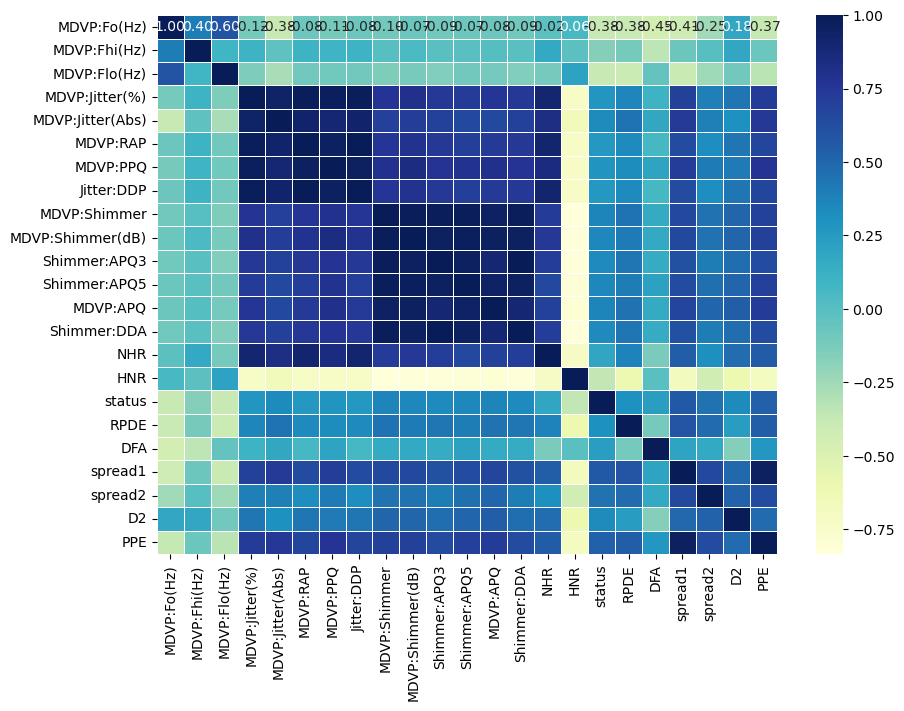

In [27]:
corr_matrix =  df.corr()
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

### Modelling 

In [28]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [29]:
# Split data into X and y
X = df.drop("status", axis=1)

y = df["status"]

In [30]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [32]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

trying out # different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier

In [33]:
# Put MOdels into a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # set Random Seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\USER\Miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8974358974358975,
 'KNN': 0.8205128205128205,
 'Random Forest': 0.9487179487179487}

### Model Comparison

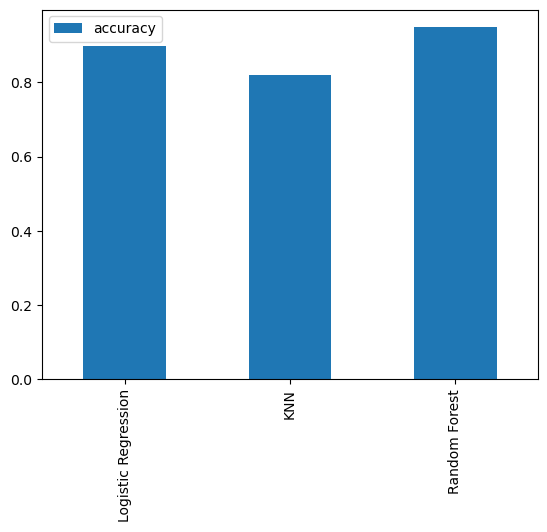

In [35]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Let's try the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning


In [36]:
# Let's tune KNN

train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [37]:
train_scores

[1.0,
 0.9294871794871795,
 0.9294871794871795,
 0.8910256410256411,
 0.8974358974358975,
 0.8782051282051282,
 0.8974358974358975,
 0.8974358974358975,
 0.8846153846153846,
 0.8910256410256411,
 0.8846153846153846,
 0.8846153846153846,
 0.8269230769230769,
 0.8333333333333334,
 0.8269230769230769,
 0.8333333333333334,
 0.8076923076923077,
 0.7948717948717948,
 0.7948717948717948,
 0.7948717948717948]

In [38]:
test_scores

[0.7948717948717948,
 0.7435897435897436,
 0.7948717948717948,
 0.7692307692307693,
 0.8205128205128205,
 0.7435897435897436,
 0.8205128205128205,
 0.7948717948717948,
 0.7948717948717948,
 0.7948717948717948,
 0.7692307692307693,
 0.7692307692307693,
 0.7948717948717948,
 0.7948717948717948,
 0.8205128205128205,
 0.7692307692307693,
 0.8205128205128205,
 0.7435897435897436,
 0.7692307692307693,
 0.717948717948718]

Maximum KNN score on the test data: 82.05%


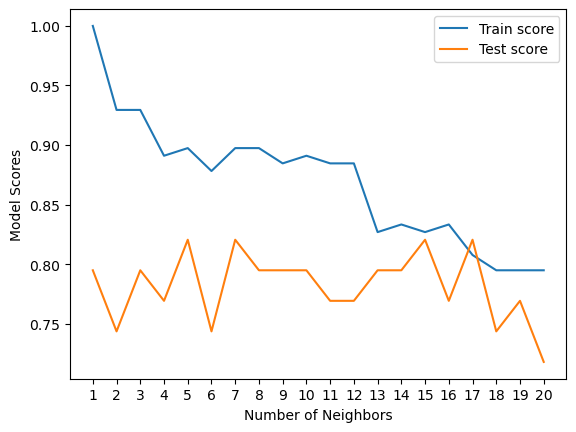

In [39]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning Using RandomSearchCV

here to tune:
* LogisticRegression()
* RandomForestCLassifier()
  
...using RandomizedSearchCV

In [40]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": (2, 20, 2),
          "min_samples_leaf": (1, 20, 2)}

In [41]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [43]:
rs_log_reg.score(X_test, y_test)

0.8717948717948718

In [44]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': (1, 20, 2),
                                        'min_samples_split': (2, 20, 2),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [45]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [46]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9487179487179487

### Hyperparameter Tuning with GridSearchCV

In [47]:
# Different Hyperparameters for our  LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
# check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [49]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8717948717948718

### Evaluating our turned machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [50]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [51]:
y_test

138    1
16     1
155    1
96     1
68     1
153    1
55     1
15     1
112    1
111    1
184    0
18     1
82     1
9      1
164    1
117    1
69     1
113    1
192    0
119    1
123    1
144    1
66     1
45     0
158    1
115    1
67     1
93     1
30     0
101    1
118    1
75     1
24     1
172    0
127    1
169    0
19     1
168    0
73     1
Name: status, dtype: int64

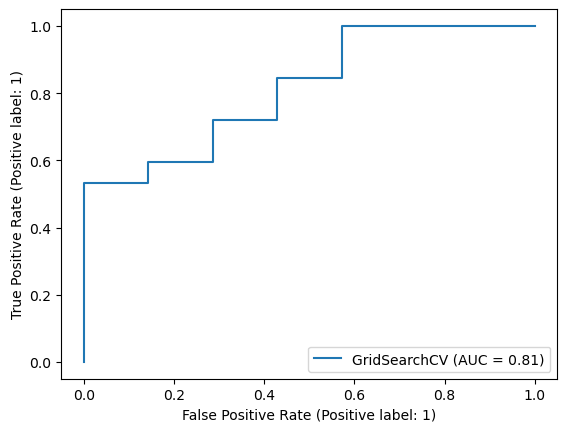

In [52]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [53]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 3  4]
 [ 1 31]]


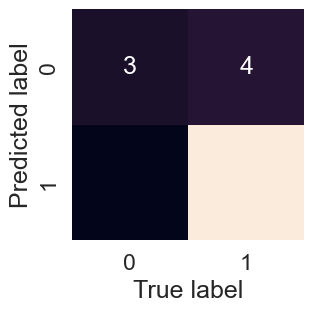

In [54]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.89      0.97      0.93        32

    accuracy                           0.87        39
   macro avg       0.82      0.70      0.74        39
weighted avg       0.86      0.87      0.86        39



### Calculate evaluation metrics using cross-validation

To calculate accuracy, precision, recall and F1-score of our model using cross-validation (`cross_val_score`)

In [56]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [57]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.38566204211634725,
                         solver= 'liblinear')

In [58]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc

array([0.92307692, 0.82051282, 0.82051282, 0.74358974, 0.74358974])

In [59]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8102564102564103

In [60]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8102564102564103

In [61]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8351547303271442

In [62]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9455172413793104

In [63]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8839014686709102

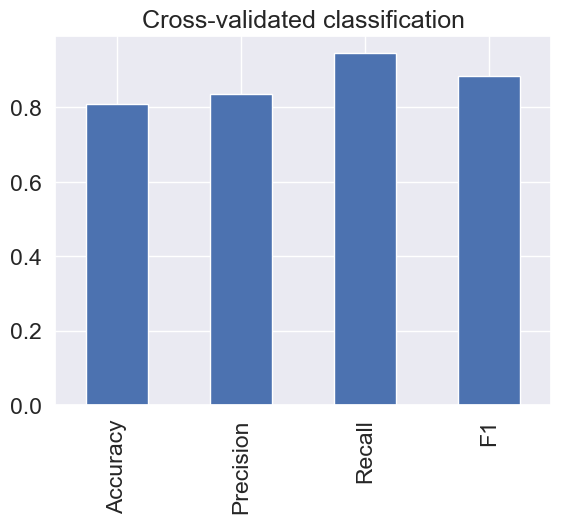

In [64]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification",
                     legend=False);

### Feature Importance

In [65]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.38566204211634725,
                         solver= 'liblinear')

clf.fit(X_train, y_train);

In [66]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [67]:
# Check coef_
clf.coef_

array([[-6.03299524e-03, -3.58157531e-03, -5.09644878e-03,
         1.04321554e-02,  8.01599400e-05,  7.01404669e-03,
         6.87874436e-03,  2.10385950e-02,  6.54384478e-02,
         6.39669217e-01,  3.30692982e-02,  4.10385878e-02,
         5.66581809e-02,  9.91927602e-02,  4.87921566e-02,
         7.74598469e-02,  3.67781534e-01,  5.24329655e-01,
         7.48228896e-01,  3.62938038e-01,  1.98739715e+00,
         4.33868090e-01]])

In [68]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'MDVP:Fo(Hz)': -0.006032995237394964,
 'MDVP:Fhi(Hz)': -0.0035815753146795433,
 'MDVP:Flo(Hz)': -0.005096448776080219,
 'MDVP:Jitter(%)': 0.01043215543441971,
 'MDVP:Jitter(Abs)': 8.015993998328639e-05,
 'MDVP:RAP': 0.007014046685068763,
 'MDVP:PPQ': 0.006878744358697267,
 'Jitter:DDP': 0.0210385950198442,
 'MDVP:Shimmer': 0.06543844782090215,
 'MDVP:Shimmer(dB)': 0.639669216662642,
 'Shimmer:APQ3': 0.03306929819450357,
 'Shimmer:APQ5': 0.04103858779069665,
 'MDVP:APQ': 0.056658180901015834,
 'Shimmer:DDA': 0.09919276016929562,
 'NHR': 0.04879215658320067,
 'HNR': 0.0774598469448693,
 'status': 0.3677815343487657,
 'RPDE': 0.5243296545618489,
 'DFA': 0.7482288959570033,
 'spread1': 0.3629380382261813,
 'spread2': 1.9873971479472652,
 'D2': 0.4338680896824076}

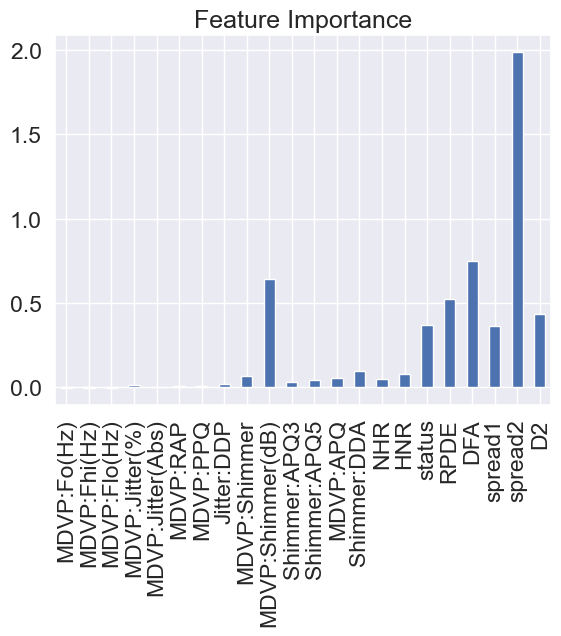

In [69]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [70]:
pd.crosstab(df["spread2"], df["status"])

status,0,1
spread2,,
0.006274,1,0
0.018689,1,0
0.056844,1,0
0.063412,0,1
0.066994,1,0
...,...,...
0.396746,0,1
0.397749,0,1
0.414758,0,1
